In [1]:
#general imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas_visual_analysis import VisualAnalysis
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#model building imports
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
#evaluation imports
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#importing data
data=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data  Preprocessing

In [3]:
data.isnull().sum() #checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.drop('CustomerID',axis=1,inplace=True) #dropping id column

In [5]:
data.dtypes #datatypes of columns

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Exploratory Data Analysis

#### Distribution of Income

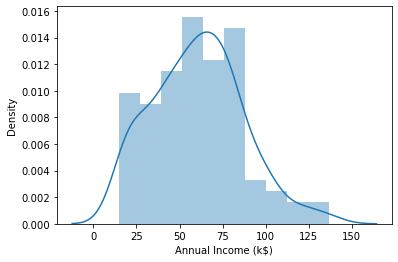

In [6]:
sns.distplot(data['Annual Income (k$)']);

Income has a normal distribution.

#### Spending Score Distribution

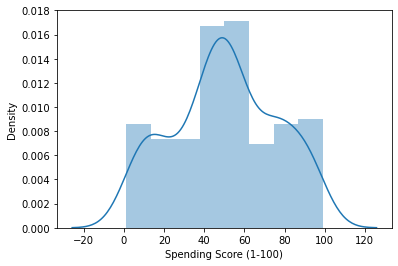

In [7]:
sns.distplot(data['Spending Score (1-100)']);

Spending Score has a normal distribution.

#### Gender Analysis

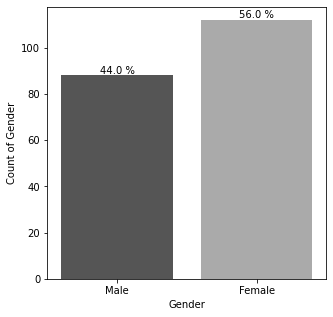

In [8]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(data['Gender'],palette='gist_gray')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
for bar in ax.patches:                                                  
    percentage = f"{round((bar.get_height() /data.shape[0])*100 , 2)} %"  
    x = bar.get_x() + bar.get_width() /2                               
    y = bar.get_height()                                               
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )

In [9]:
gender=pd.pivot_table(data,index=['Gender'],values=['Spending Score (1-100)'],aggfunc='mean')
gender.reset_index(inplace=True)
gender

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


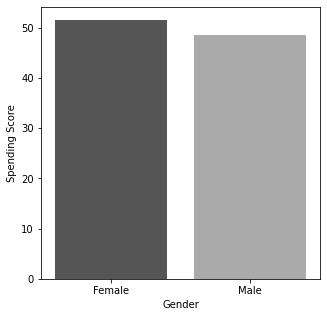

In [10]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(x=gender['Gender'],y=gender['Spending Score (1-100)'],palette='gist_gray');
plt.xlabel('Gender')
plt.ylabel('Spending Score');

From this we can see that Female count is high when compared to male and also they tend to spend slightly more than male.

#### Relation Between Income and Spending

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

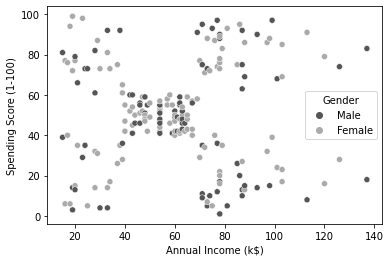

In [11]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=data['Gender'],palette='gist_gray')

we can see 5 cluster formation.

#### Relation Between Age and Spending Score

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

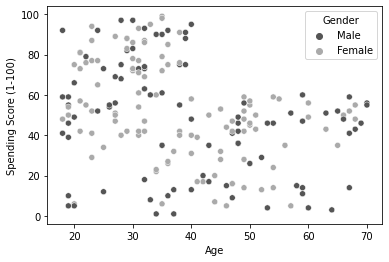

In [12]:
sns.scatterplot(data['Age'],data['Spending Score (1-100)'],hue=data['Gender'],palette='gist_gray')

No proper cluster formation visible.

#### Relation Between Age and Income

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

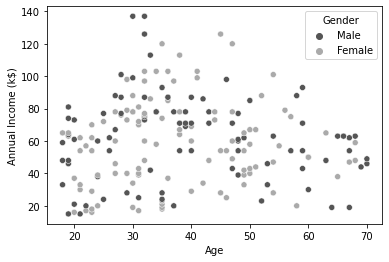

In [13]:
sns.scatterplot(data['Age'],data['Annual Income (k$)'],hue=data['Gender'],palette='gist_gray')

No proper cluster formation visible.

In [14]:
VisualAnalysis(data)

## Feature Engineering

In [15]:
cat=data.select_dtypes(include='object') #selecting object datatype

In [16]:
#converting categorical to numeric datatype
for i in cat:
    data[i]=data[i].astype('category')
for i in cat:
    data[i]=LabelEncoder().fit_transform(data[i])

## Model Building

### Agglomerative Hierarchical Clustering

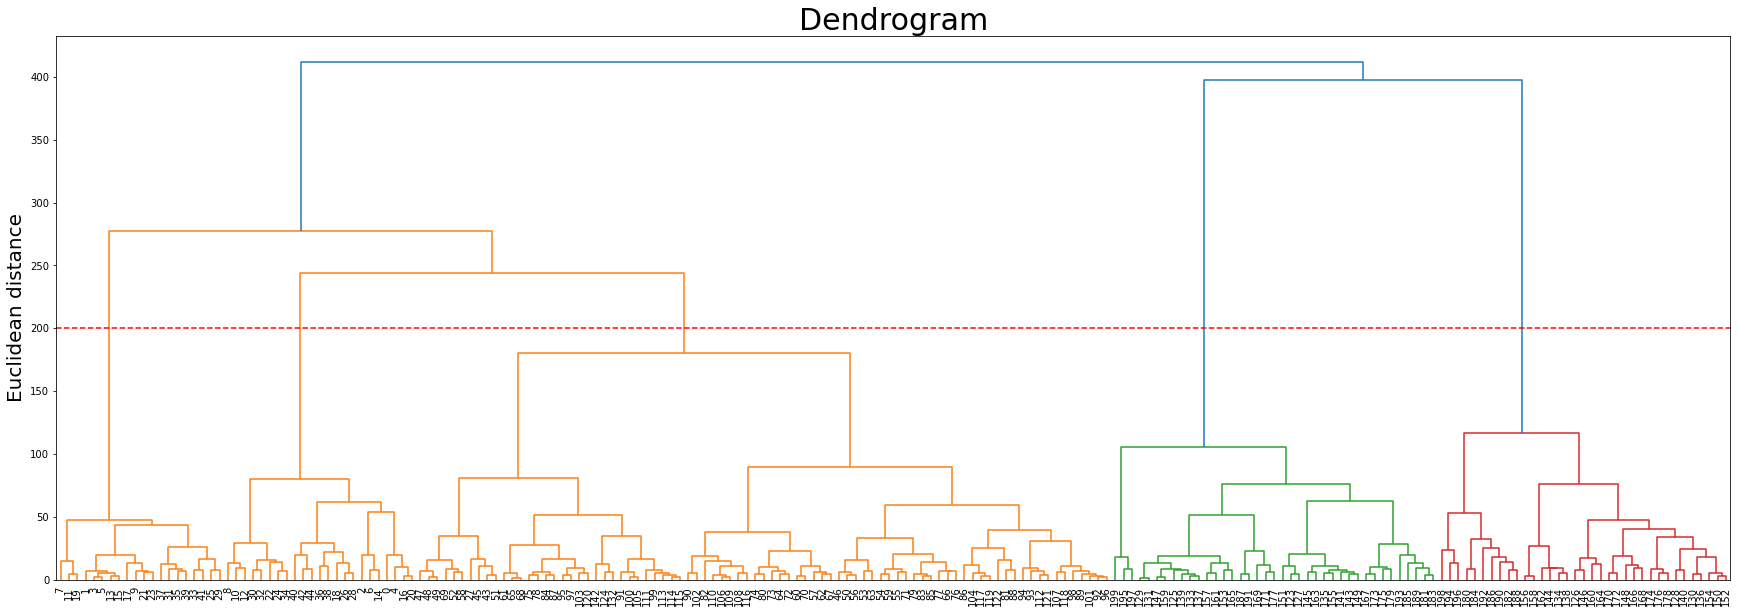

In [17]:
#dendogram
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(data, method = 'ward'),labels=data.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.ylabel('Euclidean distance', fontsize=20);

In [18]:
model1=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #building model

In [19]:
y1_pred = model1.fit_predict(data) #fitting and predicting

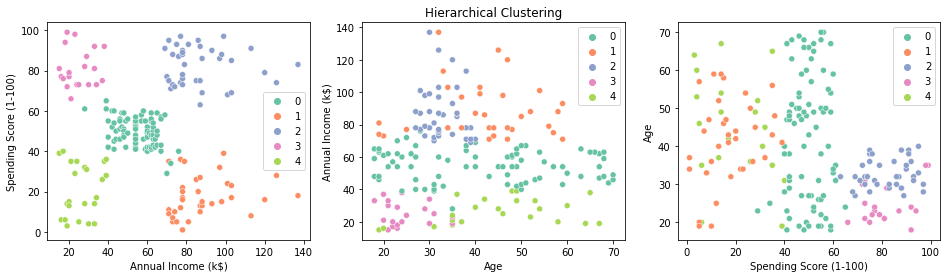

In [20]:
#visualization of clusters
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=y1_pred,palette='Set2')
plt.subplot(1,3,2)
plt.title('Hierarchical Clustering')
sns.scatterplot(x=data['Age'],y=data['Annual Income (k$)'],hue=y1_pred,palette='Set2')
plt.subplot(1,3,3)
sns.scatterplot(x=data['Spending Score (1-100)'],y=data['Age'],hue=y1_pred,palette='Set2');

In [21]:
s1=round(silhouette_score(data, y1_pred),2) #evaluation
s1

0.44

### K-Means Clustering

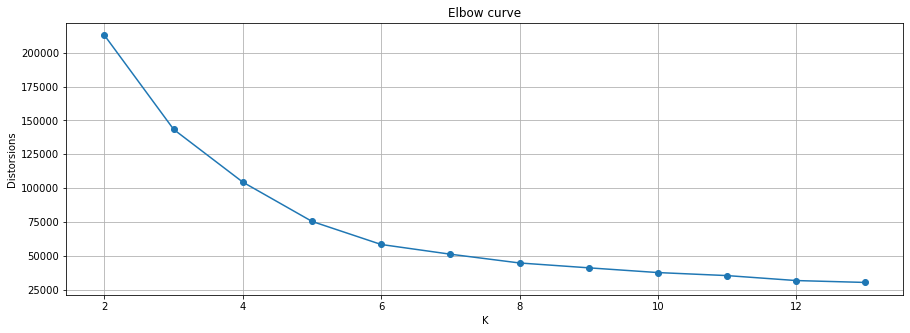

In [22]:
#elbow curve
distorsions = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 14), distorsions,marker='o')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [23]:
model2 = KMeans(n_clusters=5,random_state=42) #building model

In [24]:
y2_pred=model2.fit_predict(data) #fiting and predicting

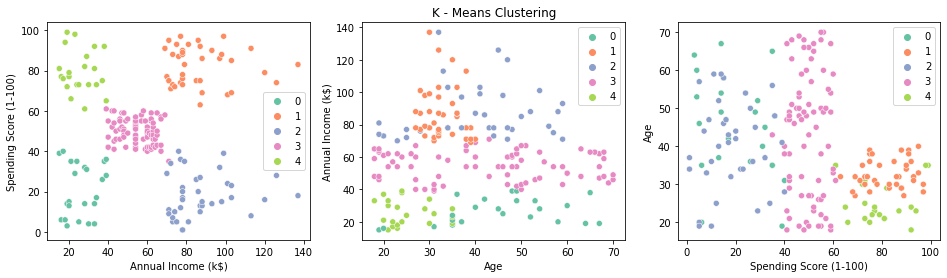

In [25]:
#visualizing clusters
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=y2_pred,palette='Set2')
plt.subplot(1,3,2)
plt.title('K - Means Clustering')
sns.scatterplot(x=data['Age'],y=data['Annual Income (k$)'],hue=y2_pred,palette='Set2')
plt.subplot(1,3,3)
sns.scatterplot(x=data['Spending Score (1-100)'],y=data['Age'],hue=y2_pred,palette='Set2');

K-Means has done clustering well on the 1st chart when compared to Hierarchical clustering.

In [26]:
s2=round(silhouette_score(data, y2_pred),2) #model evaluation
s2

0.44

#### Model Comparison

In [27]:
silhouette=pd.DataFrame()
silhouette['Model']=['Hierarchical','K-Means']
silhouette['Silhouette Scores']=[s1,s2]

In [28]:
silhouette

,Model,Silhouette Scores
0,Hierarchical,0.44
1,K-Means,0.44


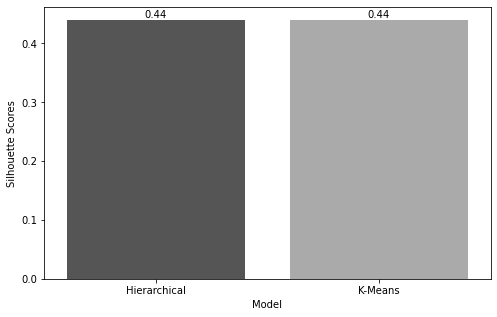

In [29]:
plt.figure(figsize=(8,5))
plot=sns.barplot(y=silhouette['Silhouette Scores'],x=silhouette['Model'],palette='gist_gray')
for i in plot.containers:
    plot.bar_label(i,)

Both the models have similar silhouette scores but as we saw clusters formed by K-Means are good so we can go with that model.

#### Visualization of clusters

In [30]:
data['Cluster']=y2_pred
X1=data[data.Cluster==0]
X2=data[data.Cluster==1]
X3=data[data.Cluster==2]
X4=data[data.Cluster==3]
X5=data[data.Cluster==4]

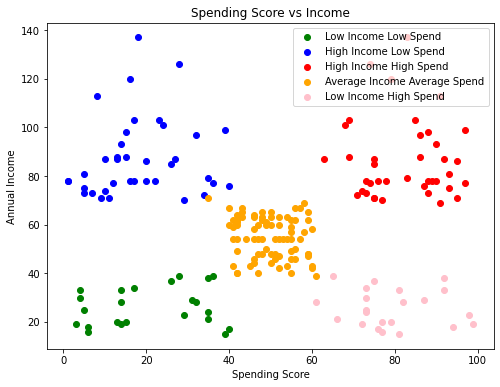

In [31]:
plt.figure(figsize=(8,6))
plt.title('Spending Score vs Income')
plt.scatter(X1['Spending Score (1-100)'],X1['Annual Income (k$)'],color='green',label='Low Income Low Spend')
plt.scatter(X3['Spending Score (1-100)'],X3['Annual Income (k$)'],color='blue',label='High Income Low Spend')
plt.scatter(X2['Spending Score (1-100)'],X2['Annual Income (k$)'],color='red',label='High Income High Spend')
plt.scatter(X4['Spending Score (1-100)'],X4['Annual Income (k$)'],color='orange',label='Average Income Average Spend')
plt.scatter(X5['Spending Score (1-100)'],X5['Annual Income (k$)'],color='pink',label='Low Income High Spend')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend(loc='upper right');

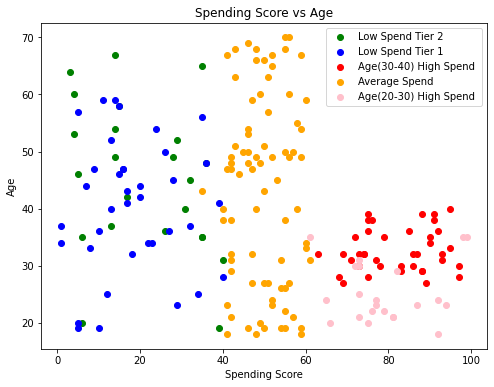

In [32]:
plt.figure(figsize=(8,6))
plt.title('Spending Score vs Age')
plt.scatter(X1['Spending Score (1-100)'],X1['Age'],color='green',label='Low Spend Tier 2')
plt.scatter(X3['Spending Score (1-100)'],X3['Age'],color='blue',label='Low Spend Tier 1')
plt.scatter(X2['Spending Score (1-100)'],X2['Age'],color='red',label='Age(30-40) High Spend')
plt.scatter(X4['Spending Score (1-100)'],X4['Age'],color='orange',label='Average Spend')
plt.scatter(X5['Spending Score (1-100)'],X5['Age'],color='pink',label='Age(20-30) High Spend ')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.legend();

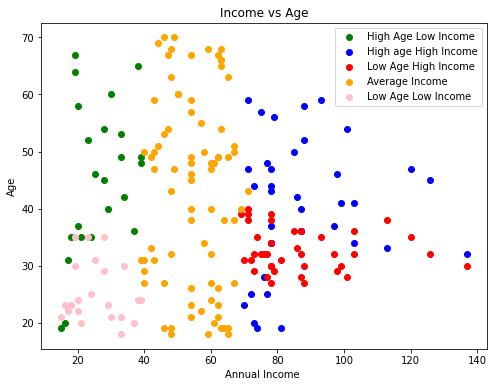

In [33]:
plt.figure(figsize=(8,6))
plt.title('Income vs Age')
plt.scatter(X1['Annual Income (k$)'],X1['Age'],color='green',label='High Age Low Income ')
plt.scatter(X3['Annual Income (k$)'],X3['Age'],color='blue',label='High age High Income')
plt.scatter(X2['Annual Income (k$)'],X2['Age'],color='red',label='Low Age High Income')
plt.scatter(X4['Annual Income (k$)'],X4['Age'],color='orange',label='Average Income')
plt.scatter(X5['Annual Income (k$)'],X5['Age'],color='pink',label='Low Age Low Income')
plt.xlabel('Annual Income ')
plt.ylabel('Age')
plt.legend();

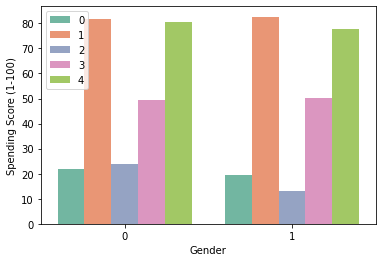

In [34]:
sns.barplot(y=data['Spending Score (1-100)'],x=data['Gender'],hue=y2_pred,palette='Set2',ci=0)
plt.legend();

These are clusters obtained from the model and we can see people separated by their age, income, gender and spending score. 

## Conclusion

As per the analysis females tend to shop more than male.

High income earners spend more when compared to low earners.

People with high & low income from over age category of 40 tend to spend less.

But those belonging to age category of 20-40 whose income is also high tend to spend more on products or services.

So it is recommended for the business to focus on these people by giving them with discounts, offers or reward points thereby increasing their sales and turnover.